> https://bcho.tistory.com/1203?category=555440

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(
    fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [31]:
df = pd.read_csv('data/최종(3대).csv', encoding = 'euc_kr')
df.head(3)

,읍면동,주차수요량,WiFi 접속자수,카드이용자수,사업체수,총인구수
0,이호동,92320,114543,269222,281,4654
1,도두동,109486,141161,441864,991,3257
2,봉개동,125338,393438,362387,269,4936


In [32]:
features = df.loc[:, ['주차수요량', '카드이용자수', '사업체수', 'WiFi 접속자수']]
features.head(3)

,주차수요량,카드이용자수,사업체수,WiFi 접속자수
0,92320,269222,281,114543
1,109486,441864,991,141161
2,125338,362387,269,393438


# 군집수 판단

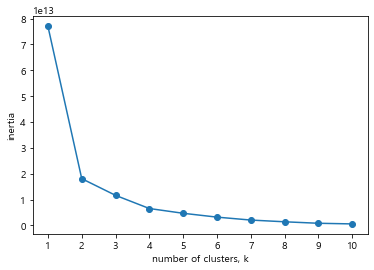

In [33]:
kmlist = []
for i in range(1,11):
    km = KMeans(n_clusters=i, algorithm='auto', random_state=42)
    km.fit(features)
    
    kmlist.append(km.inertia_)
plt.plot(range(1,11), kmlist, marker='o')
plt.xticks(range(1,11))
plt.xlabel('number of clusters, k' )
plt.ylabel('inertia')
plt.show()

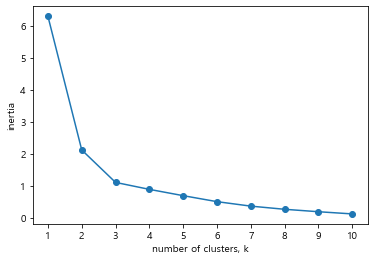

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
minmaxdata= scaler.fit_transform(features)

kmlist = []
for i in range(1,11):
    km = KMeans(n_clusters=i, algorithm='auto', random_state=42)
    km.fit(minmaxdata)
    
    kmlist.append(km.inertia_)

plt.xticks(range(1,11))
plt.xlabel('number of clusters, k' )
plt.ylabel('inertia')
plt.plot(range(1,11), kmlist, marker='o')
# 군집 중심에서 각 클러스터 내 점 거리 합산
plt.show()


In [35]:
model = KMeans(n_clusters=3, algorithm='auto')
model.fit(features)

predict = pd.DataFrame(model.predict(features)+1)
predict.columns = ['군집']
predict

,군집
0,3
1,3
2,3
3,3
4,3
5,3
6,3
7,3
8,3
9,3


In [36]:
r = pd.concat([df['읍면동'] ,features, predict], axis = 1)
r

,읍면동,주차수요량,카드이용자수,사업체수,WiFi 접속자수,군집
0,이호동,92320,269222,281,114543,3
1,도두동,109486,441864,991,141161,3
2,봉개동,125338,362387,269,393438,3
3,외도동,126119,944828,1185,994026,3
4,삼양동,131851,1042792,1000,638591,3
5,건입동,188864,763641,750,1018933,3
6,화북동,217816,1025585,1546,1346005,3
7,구좌읍,244206,952715,1738,565136,3
8,한림읍,289376,1377325,2174,450801,3
9,오라동,306129,854466,978,300518,3


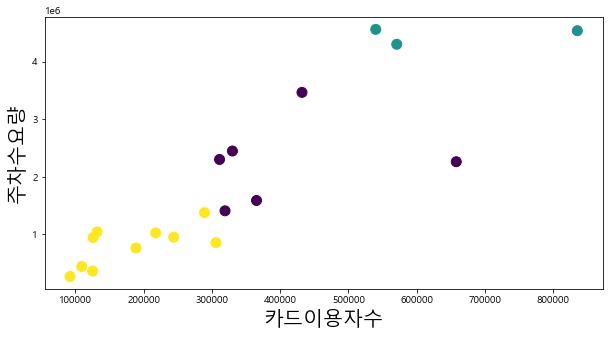

In [37]:
plt.figure(figsize=(10,5))
plt.xlabel('카드이용자수', fontsize=20)
plt.ylabel('주차수요량', fontsize=20)
plt.scatter(r['주차수요량'], r['카드이용자수'], c = r['군집'], alpha = 5, s = 100)
plt.show()

In [10]:
# centers = pd.DataFrame(model.cluster_centers_, columns = ['주차수요량', '카드이용자수'])
# center_x = centers['주차수요량']
# center_y = centers['카드이용자수']
# plt.scatter(r['주차수요량'], r['카드이용자수'], c = r['predict'], alpha = 0.5)
# plt.scatter(center_x, center_y, s=50, marker='D', c ='r')
# plt.show()

# 스케일링

In [11]:
scaler = StandardScaler()
model = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, model)

In [12]:
pipeline.fit(features)
predict = pd.DataFrame(pipeline.predict(features)+1)
predict.columns = ['군집']
predict

,군집
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [38]:
a = pd.concat([df['읍면동'] ,features, predict], axis = 1)
a.sort_values(['주차수요량'], ascending = False)

,읍면동,주차수요량,카드이용자수,사업체수,WiFi 접속자수,군집
18,이도동,835605,4538944,6694,4783256,2
17,애월읍,658186,2262602,2514,939748,1
16,연동,570989,4303620,4649,3126565,2
15,노형동,540207,4562480,4476,4834174,2
14,용담동,432139,3467293,1918,2471079,1
13,조천읍,365507,1589216,1873,1677427,1
12,일도동,330199,2448666,3536,3617973,1
11,삼도동,319379,1409400,2396,2143600,1
10,아라동,311332,2301873,2049,1552059,1
9,오라동,306129,854466,978,300518,3


In [14]:
a.to_csv('kmeans.csv', encoding = 'euc_kr')

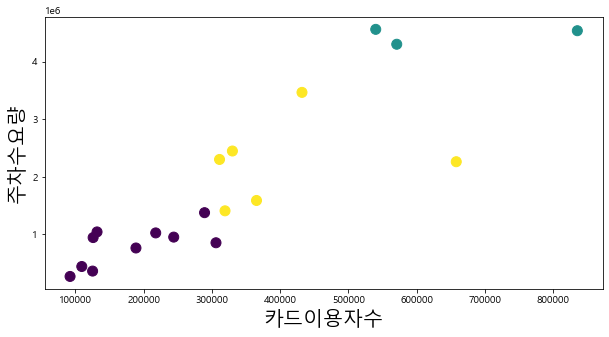

In [15]:
plt.figure(figsize=(10,5))
plt.xlabel('카드이용자수', fontsize=20)
plt.ylabel('주차수요량', fontsize=20)
plt.scatter(a['주차수요량'], a['카드이용자수'], c = a['군집'], alpha = 10, s = 100)
plt.show()